In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')

In [3]:
#Simplify the job titles
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'analytics' in title.lower():
        return 'analytics'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

#Simplify the seniority levels
def seniority(title):
    if 'sr.' in title.lower() or 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower() or 'junior' in title.lower(): 
        return 'junior'
    else: 
        return 'na'

In [4]:
#Apply title simplifier
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [5]:
#Apply seniority simplifier
df['seniority'] = df['Job Title'].apply(seniority)

In [6]:
#Fix Los Angeles
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')

In [7]:
#Job description length
df['desc_length'] = df['Job Description'].apply(lambda x: len(x))

In [8]:
#Competitor count
df['num_competitor'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)


In [9]:
#Hourly wage to annual
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis=1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis=1)

In [10]:
#Remove new line to job title
df['company_txt'] =df.company_txt.apply(lambda x: x.replace('\n',''))

<AxesSubplot:>

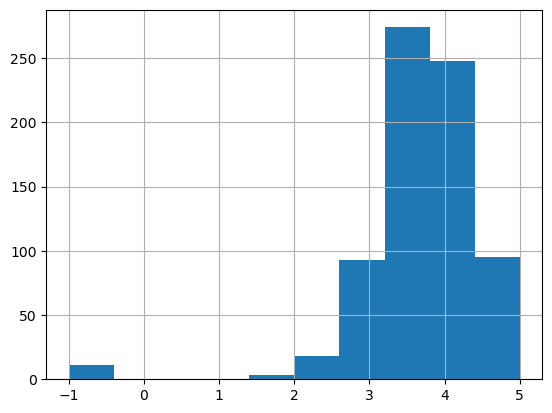

In [11]:
df.Rating.hist()

<AxesSubplot:>

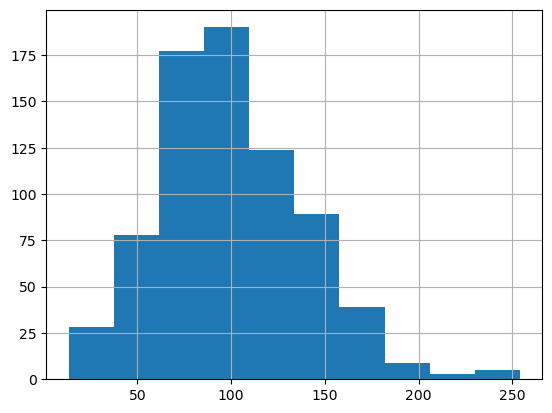

In [12]:
df.avg_salary.hist()

<AxesSubplot:>

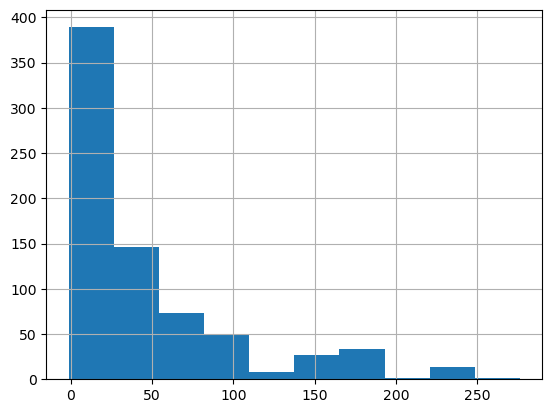

In [13]:
df.age.hist()

<AxesSubplot:>

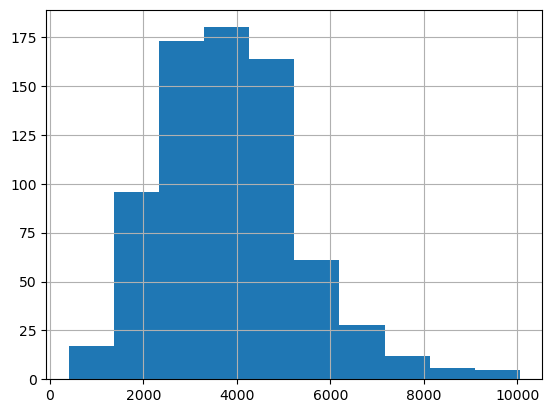

In [14]:
df.desc_length.hist()

<AxesSubplot:>

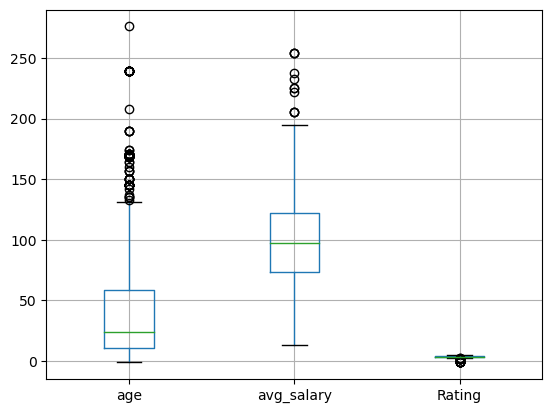

In [15]:
df.boxplot(column=['age', 'avg_salary', 'Rating'])

<AxesSubplot:>

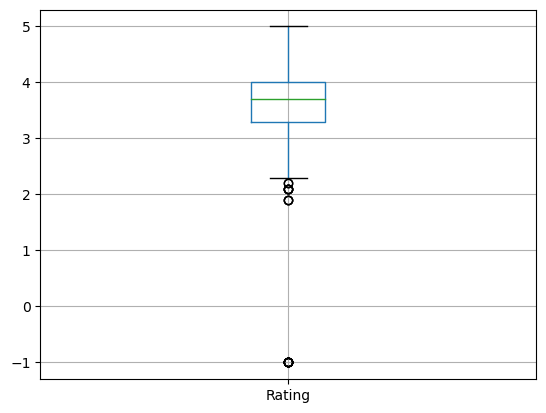

In [16]:
df.boxplot(column='Rating')

In [17]:
corr = df[['age', 'avg_salary', 'Rating','desc_length']].corr()

<AxesSubplot:>

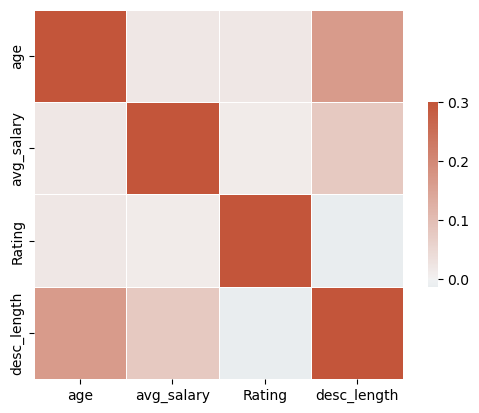

In [18]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [19]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_length',
       'num_competitor'],
      dtype='object')

In [20]:
#Categorical data
df_cat = df[['Location','Headquarters','Size','Type of ownership','Industry','Sector','Revenue','company_txt','job_state','same_state','python_yn','R_yn','spark','aws','excel','job_simp','seniority']]

graph for Location: total =200


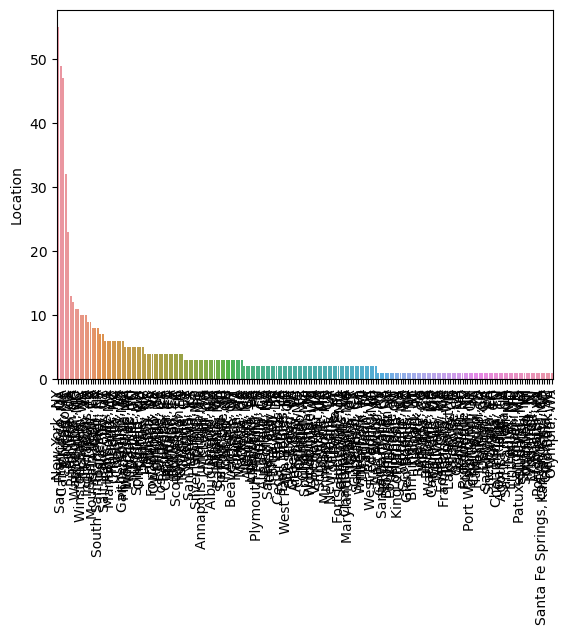

graph for Headquarters: total =198


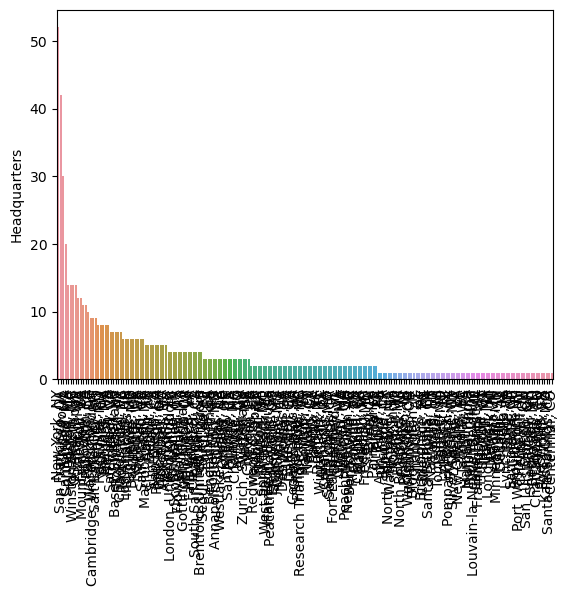

graph for Size: total =9


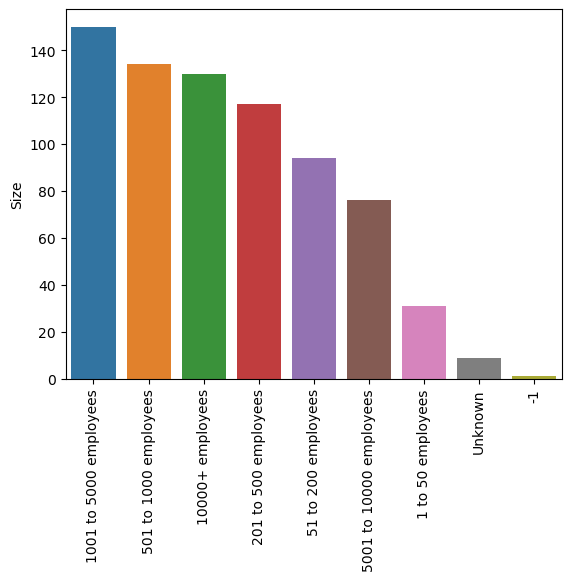

graph for Type of ownership: total =11


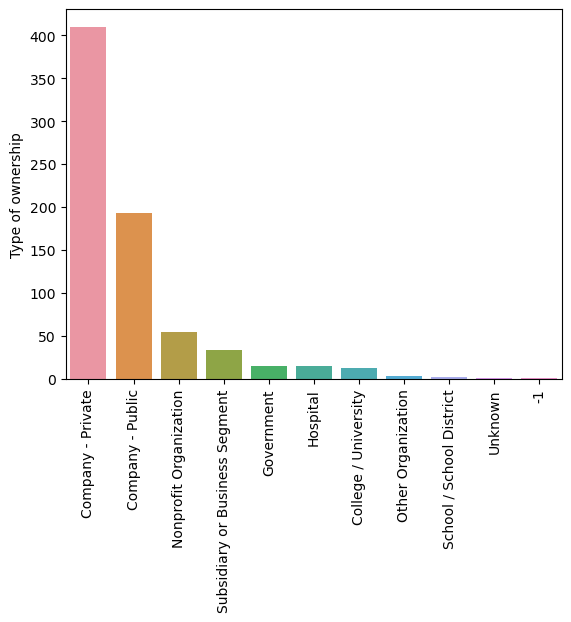

graph for Industry: total =60


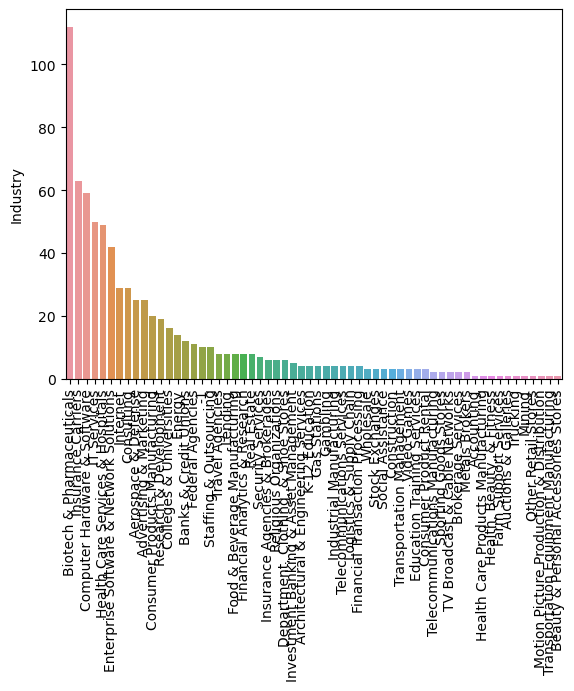

graph for Sector: total =25


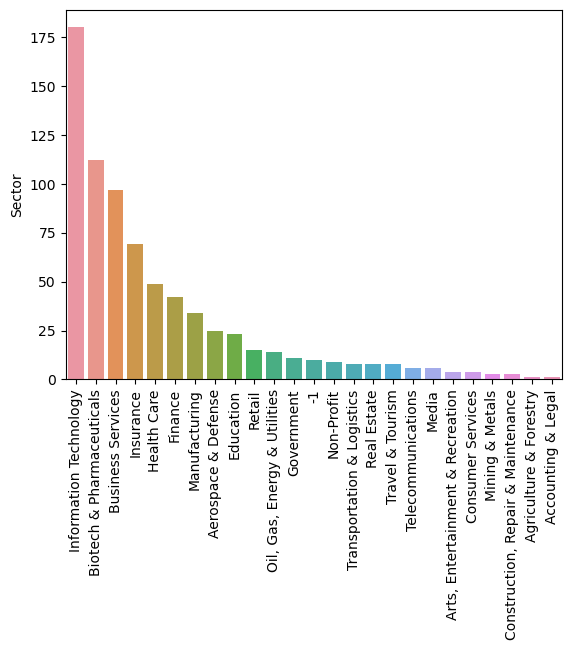

graph for Revenue: total =14


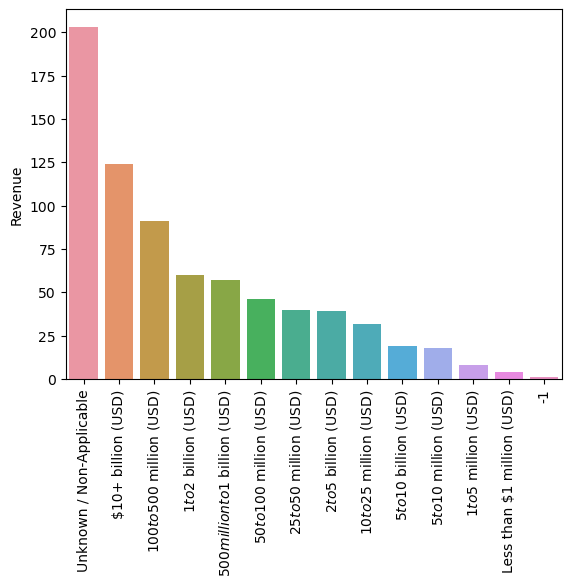

graph for company_txt: total =343


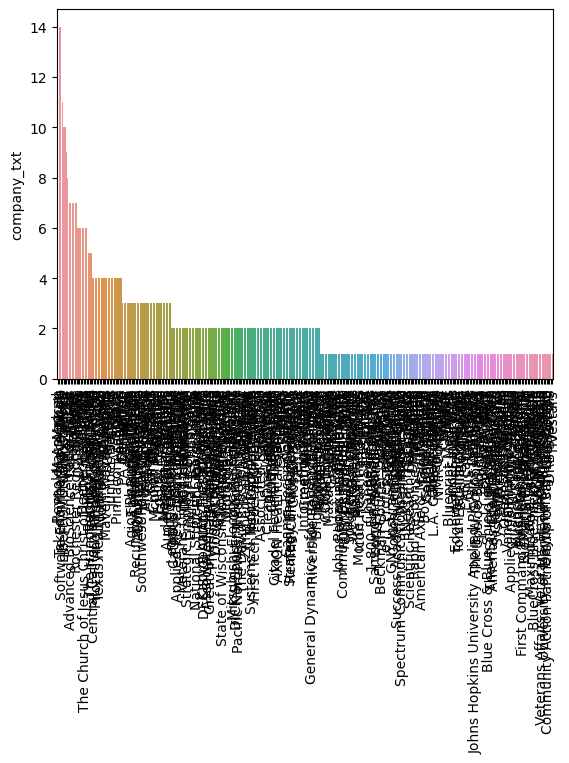

graph for job_state: total =37


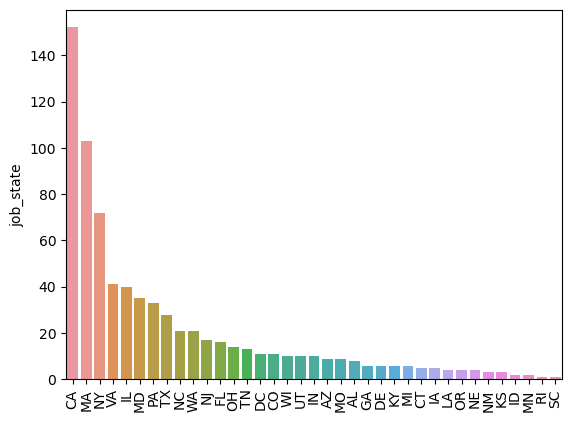

graph for same_state: total =2


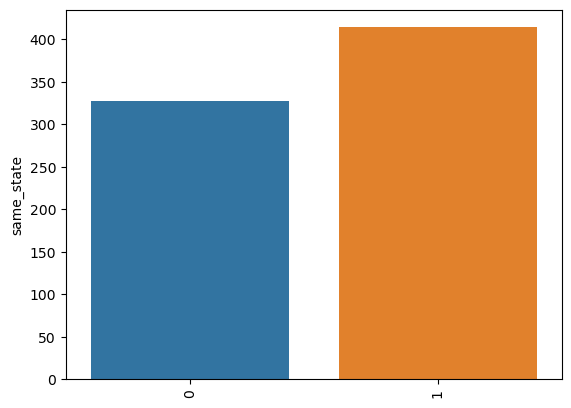

graph for python_yn: total =2


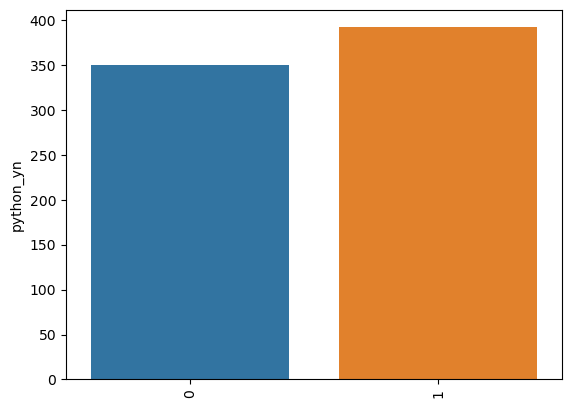

graph for R_yn: total =2


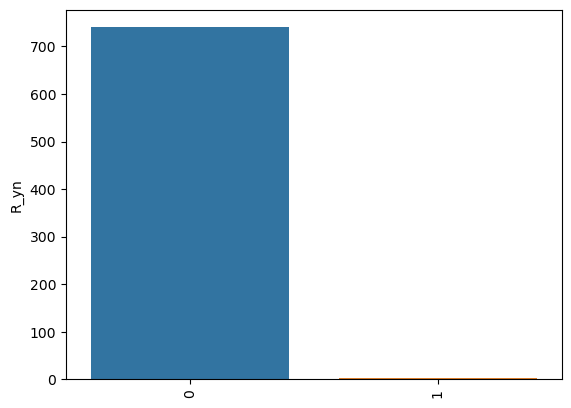

graph for spark: total =2


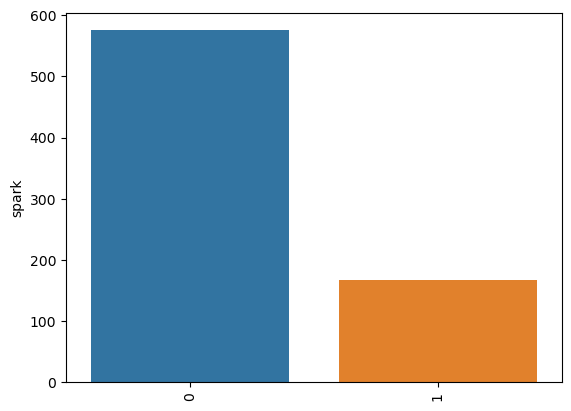

graph for aws: total =2


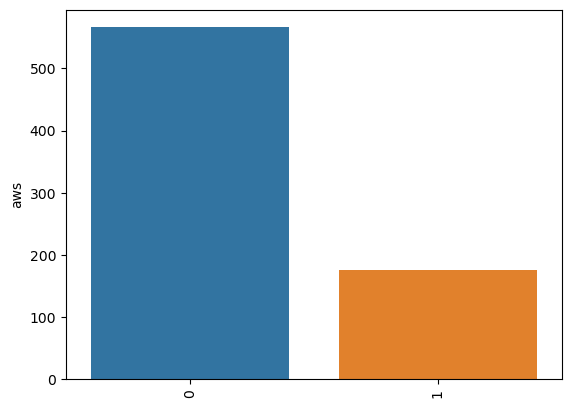

graph for excel: total =2


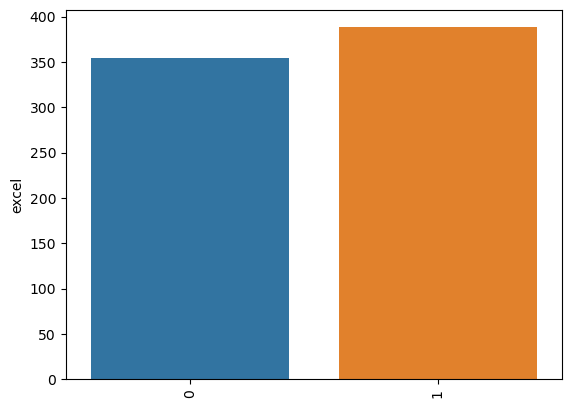

graph for job_simp: total =8


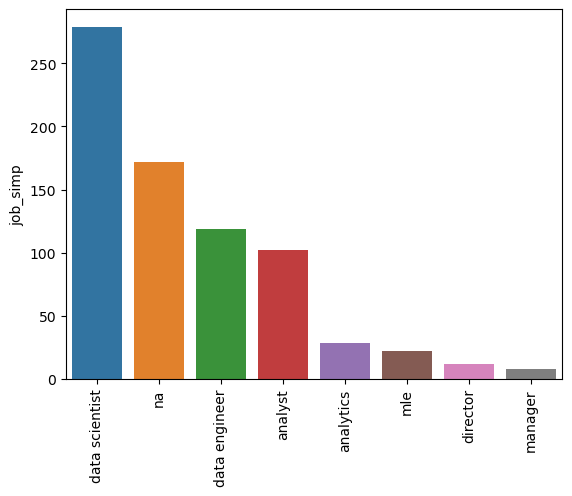

graph for seniority: total =3


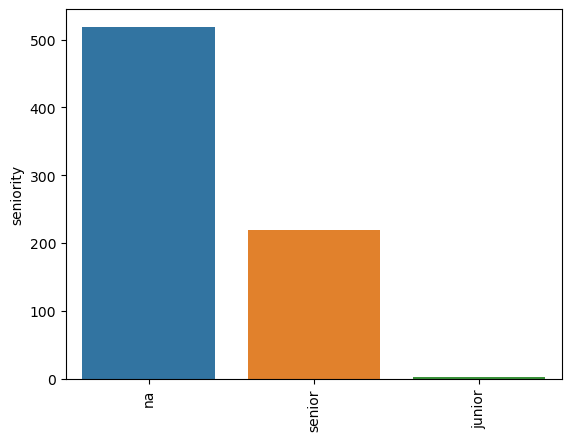

In [21]:
for i in df_cat:
    cat_num = df_cat[i].value_counts()
    print('graph for %s: total =%d' % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()

graph for Location: total =20


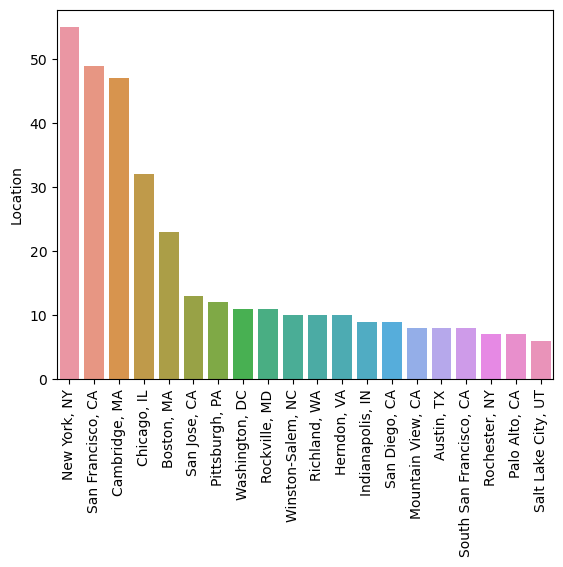

graph for Headquarters: total =20


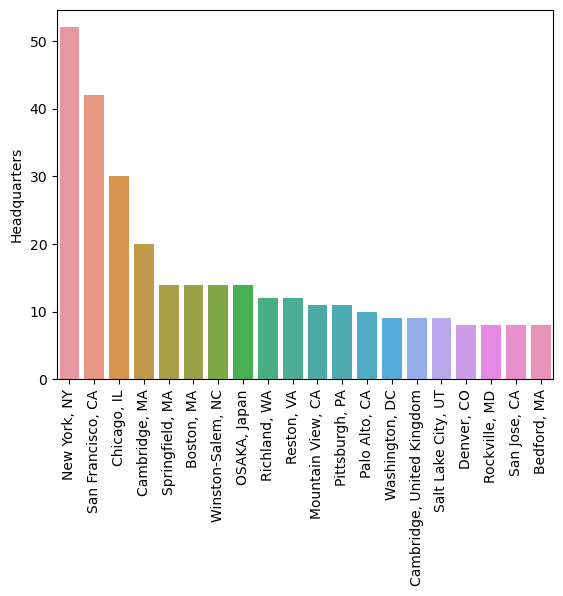

graph for company_txt: total =20


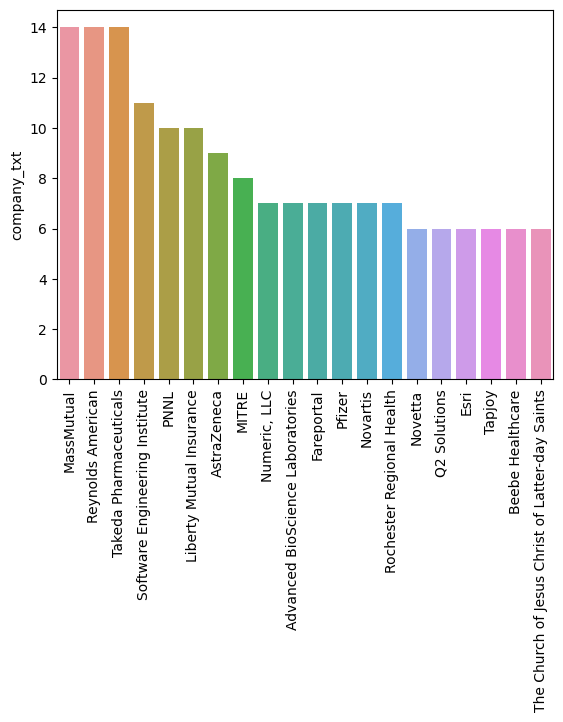

In [22]:
for i in df_cat[['Location','Headquarters','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print('graph for %s: total =%d' % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()

In [23]:
#Pivot table 
pd.pivot_table(df, index='job_simp', values='avg_salary')


,avg_salary
job_simp,
analyst,65.857843
analytics,85.000000
data engineer,105.403361
data scientist,117.564516
director,164.291667
manager,105.937500
mle,126.431818
na,85.017442


In [24]:
pd.pivot_table(df, index=['job_simp','seniority'], values='avg_salary')

avg_salary
job_simp       seniority            
analyst        junior      53.250000
               na          61.308219
               senior      79.092593
analytics      na          81.000000
               senior     109.000000
data engineer  na          96.701220
               senior     124.689189
data scientist junior     106.500000
               na         107.043011
               senior     138.956522
director       na         164.291667
manager        na         105.937500
mle            na         119.133333
               senior     142.071429
na             na          74.306723
               senior     109.066038

In [25]:
pd.set_option('display.max_rows', None)
pd.pivot_table(df, index=['job_state', 'job_simp'], aggfunc='count', values='avg_salary').sort_values('job_state', ascending=False)

avg_salary
job_state job_simp                  
WI        na                       4
          data scientist           3
          analyst                  3
WA        na                       1
          data scientist          17
          analyst                  3
VA        na                       5
          mle                      2
          data scientist          18
          data engineer           10
          analyst                  6
UT        data engineer            3
          analyst                  4
          data scientist           3
TX        na                       7
          data scientist          13
          data engineer            8
TN        data scientist           1
          data engineer           10
          analyst                  2
SC        na                       1
RI        analyst                  1
PA        data scientist           6
          analytics                2
          data engineer            1
          analyst                  8
          manager                  3
          na                       6
          mle                      7
OR        data scientist           3
          data engineer            1
OH        na                       3
          data scientist           7
          analyst                  4
NY        data engineer            4
          analyst                 14
          analytics                1
          na                      11
          data scientist          40
          mle                      2
NM        data scientist           3
NJ        data engineer            2
          analyst                  6
          analytics                2
          na                       1
          data scientist           4
          director                 2
NE        na                       4
NC        na                      12
          data scientist           3
          data engineer            6
MO        na                       3
          data scientist           3
          analytics                1
          analyst                  2
MN        data engineer            1
          analyst                  1
MI        analytics                2
          data scientist           4
MD        na                      16
          data scientist          13
          data engineer            3
          analyst                  3
MA        na                      44
          manager                  3
          director                 6
          data scientist          30
          data engineer           12
          analytics                4
          analyst                  4
LA        analyst                  1
          na                       1
          data engineer            2
KY        data scientist           2
          na                       4
KS        mle                      3
IN        na                       3
          data scientist           2
          data engineer            4
          analytics                1
IL        analyst                  3
          na                       4
          mle                      2
          director                 4
          data scientist          15
          data engineer            8
          analytics                4
ID        analyst                  2
IA        analyst                  2
          data engineer            3
GA        na                       3
          data scientist           3
FL        data scientist           7
          data engineer            3
          analyst                  6
DE        na                       6
DC        data scientist           5
          data engineer            4
          analyst                  2
CT        data scientist           2
          analytics                3
CO        data scientist           3
          analyst                  1
          data engineer            3
          na                       3
          mle                      1
CA        na                  

In [26]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index='job_state', values='avg_salary').sort_values('avg_salary', ascending=False)

,avg_salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [27]:
# rating, industry, sector, revenue, num_competitor, hourly, employer_provided, python, r, spark, aws, excel, type of ownership

In [28]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_competitor', 'hourly', 'employer_provided', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'Type of ownership','avg_salary']]

In [29]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index=i, values='avg_salary').sort_values('avg_salary', ascending=False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [30]:
pd.pivot_table(df_pivots, index='Revenue', columns='python_yn', values='avg_salary', aggfunc='count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [40]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
#from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to C:\Users\Gideon
[nltk_data]     Markus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Gideon
[nltk_data]     Markus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


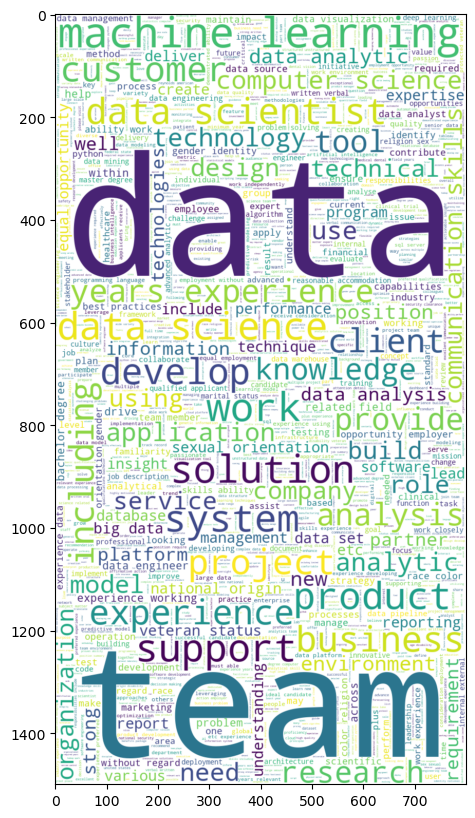

In [41]:
words = ' '.join(df["Job Description"])

def punctuation_stop(text):
    """Remove punctuation and stop words """
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc = WordCloud(background_color = 'white', random_state = 1, stopwords= STOPWORDS, max_words = 2000, width=800, height= 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis='off'
plt.show()

In [ ]:
df.columns